# Basic picture manipulation tools

Tools for manipulating the basic properties of pictures. Standard python packages are used for simple manipulation of images. These tools can be used as the basis for more complex image manipulations.

#### Useful packages and required package installation

A useful package for geometric transformations is Scipy multidimensional image processing (scipy.ndimage).  Some options of this package are shown below, more can be found here: https://docs.scipy.org/doc/scipy/reference/ndimage.html

For reading and writing images we use Imageio. It can handle a large variety of different formats: https://imageio.readthedocs.io/en/stable/formats.html

Package installation with conda:

    conda install numpy scipy matplotlib
    conda install imageio

#### Required settings and imports

In [1]:
# matplotlib settings
%matplotlib inline

In [2]:
# import packages
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimg   # Scipy multidimensional image processing

## Read, write and display example image

Read an example picture from file. 
The example picture used here can be downloaded from
https://www.freeimages.com/photo/vikingland-1316664
(medium size recommended)

In [3]:
# read picture
ex_pic = imageio.imread('vikingland-medium.jpg')

In [4]:
# write picture in different format
imageio.imwrite('test-image.tiff', ex_pic)

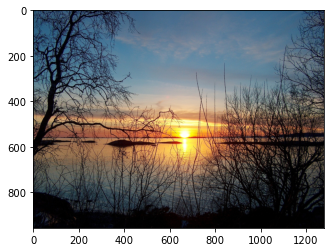

In [5]:
# display picture
plt.imshow(ex_pic)
plt.show()

In [6]:
# find out image data structure
print ('image dimensions = ', ex_pic.shape[0], ',', ex_pic.shape[1])
print ('number of color channels = ',ex_pic.shape[2])

image dimensions =  957 , 1279
number of color channels =  3


The picture is a standard RGB picture with 957x1279 pixel and three color channels (red, green, blue)

## Basic color manipulations
The color channels can be separated and manipulated

### Remove color channels

The color channels can be manipulated separately. In order to remove a color channels it can be set to zero

In [7]:
# remove 0 channel (red)
img1 = np.zeros(ex_pic.shape, dtype=int)    # initialize new image with all channels set to zero
img1[:,:,1] += ex_pic[:,:,1]       # add old channel 1 to new image
img1[:,:,2] += ex_pic[:,:,2]       # add old channel 2 to new image

In [8]:
# remove 1 channel (green)
img2 = np.zeros(ex_pic.shape, dtype=int)    # initialize new image with all channels set to zero
img2[:,:,0] += ex_pic[:,:,0]       # add old channel 0 to new image
img2[:,:,2] += ex_pic[:,:,2]       # add old channel 2 to new image

In [9]:
# remove 2 channel (blue)
img3 = np.zeros(ex_pic.shape, dtype=int)    # initialize new image with all channels set to zero
img3[:,:,0] += ex_pic[:,:,0]       # add old channel 0 to new image
img3[:,:,1] += ex_pic[:,:,1]       # add old channel 1 to new image

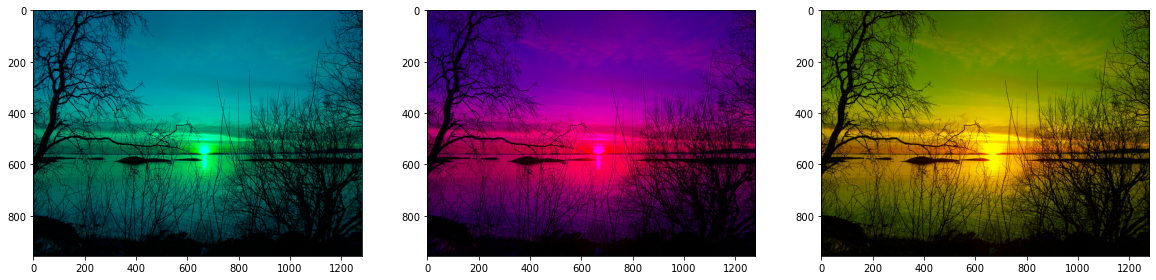

In [10]:
# display images with color channels removed
plt.figure(figsize=(20, 13))

plt.subplot(131)
plt.imshow(img1)

plt.subplot(132)
plt.imshow(img2)

plt.subplot(133)
plt.imshow(img3)

plt.show()

### Invert colors

In [11]:
# Each color channel can have values between 1 and 255. Based on this we define the color range
c_range = [1,255] # color range for this picture

Using the parameters above we can invert the image colors

In [12]:
# Initialize inverted image data structure
nimg = np.ones(ex_pic.shape, dtype=int)

In [13]:
# set all values in data structure to maximum color range
nimg *= c_range[1]

In [14]:
# Set each pixel in each color channel to the inverted value by subtracting its value from the maximum range value
for i in range(3):
    nimg[:,:,i] -= ex_pic[:,:,i]

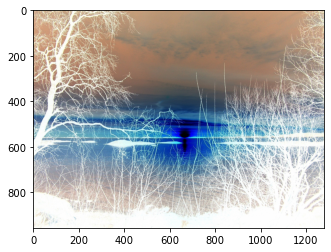

In [15]:
# show inverted image
plt.imshow(nimg)
plt.show()

## Basic geometric operations

#### shift image periodically

In [16]:
# distance (in pixel) to shift the image
n_shift = 400 

In [17]:
img2 = np.zeros(ex_pic.shape, dtype=int) # initialize
nd_im = np.array(ex_pic)
for i in range(3):
    img2[:,:,i] = ndimg.interpolation.shift(nd_im[:,:,i],[n_shift,n_shift], mode='wrap')

#### rotate image

In [18]:
# rotation angle
angle = 30

In [19]:
img3 = np.zeros(ex_pic.shape, dtype=int) # initialize
nd_im = np.array(ex_pic)
for i in range(3):
    img3[:,:,i] = ndimg.rotate(nd_im[:,:,i], angle, reshape=False)

#### plot shifted and rotated picture and compare to original

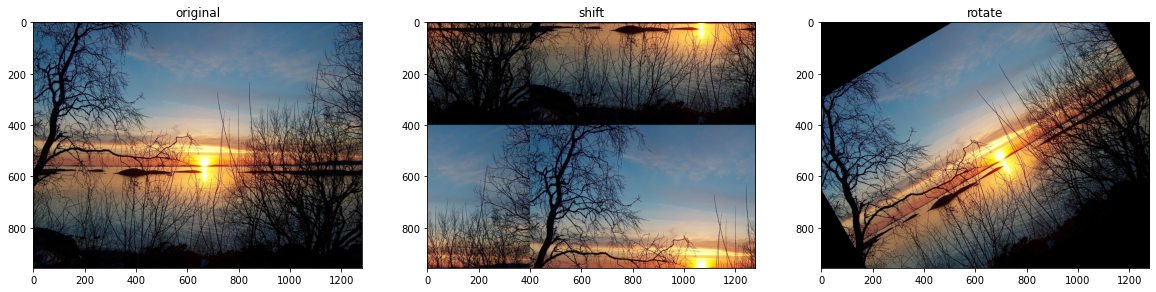

In [20]:
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.imshow(ex_pic)
plt.title('original')

plt.subplot(232)
plt.imshow(img2)
plt.title('shift')

plt.subplot(233)
plt.imshow(img3)
plt.title('rotate')

plt.show()